In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import MultiCursor

In [19]:
data=pd.read_csv("ITC.NS.csv")

In [20]:
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2021-10-11  232.000000  239.500000  231.699997  238.050003  222.440735   
1    2021-10-12  238.600006  243.000000  238.000000  241.300003  225.477631   
2    2021-10-13  242.550003  250.899994  240.149994  249.199997  232.859619   
3    2021-10-14  253.250000  261.850006  250.350006  256.549988  239.727631   
4    2021-10-18  261.000000  265.299988  257.350006  262.549988  245.334229   
..          ...         ...         ...         ...         ...         ...   
491  2023-10-04  439.750000  441.700012  433.299988  436.100006  436.100006   
492  2023-10-05  440.000000  440.500000  435.049988  436.049988  436.049988   
493  2023-10-06  437.850006  443.600006  436.649994  442.149994  442.149994   
494  2023-10-09  440.950012  443.200012  437.250000  440.450012  440.450012   
495  2023-10-10  440.450012  444.850006  440.450012  444.399994  444.399994   

       Volume  
0    21184428  
1    29222028  
2  

In [21]:
dif = data['Adj Close'].diff(1)  # difference between two consecutive Adj Close
dif.dropna(inplace=True)  # Replace NAN values

In [22]:
positive = dif.copy()
positive[positive < 0] = 0  # Positive values only
negative = dif.copy()
negative[negative > 0] = 0  # Negative values only

In [23]:
days = 14

In [24]:
avg_profit = positive.rolling(days).mean()
avg_loss = abs(negative.rolling(days).mean())

In [25]:
relative_strength = avg_profit / avg_loss

In [26]:
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

In [27]:
print(RSI)

1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
         ...    
491    34.843908
492    31.573367
493    42.184349
494    42.100001
495    42.388061
Name: Adj Close, Length: 495, dtype: float64


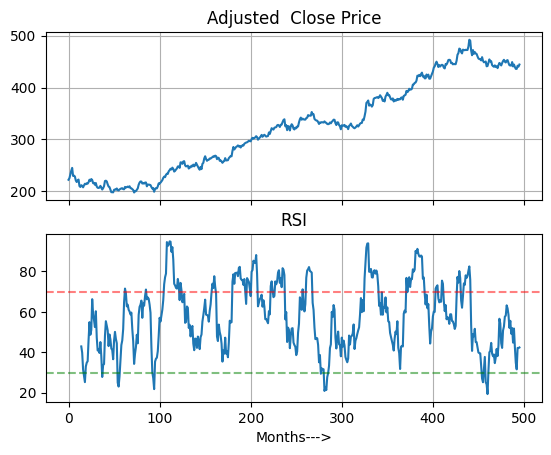

In [28]:
# Graph Plotting
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(data['Adj Close'])
ax1.grid()
ax1.set_title('Adjusted  Close Price')
ax2.plot(RSI)
ax2.grid(axis='x')
ax2.set_title('RSI')
ax2.axhline(30, linestyle='--', alpha=0.5, color='g')
ax2.axhline(70, linestyle='--', alpha=0.5, color='r')
multi = MultiCursor(None, (ax1, ax2), color='r')
plt.xlabel("Months--->")
plt.show()